In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

***Link to IRIS.csv Taken From Github : ***https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv





In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
flower=[5.7,4.8,2.6,5.1]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

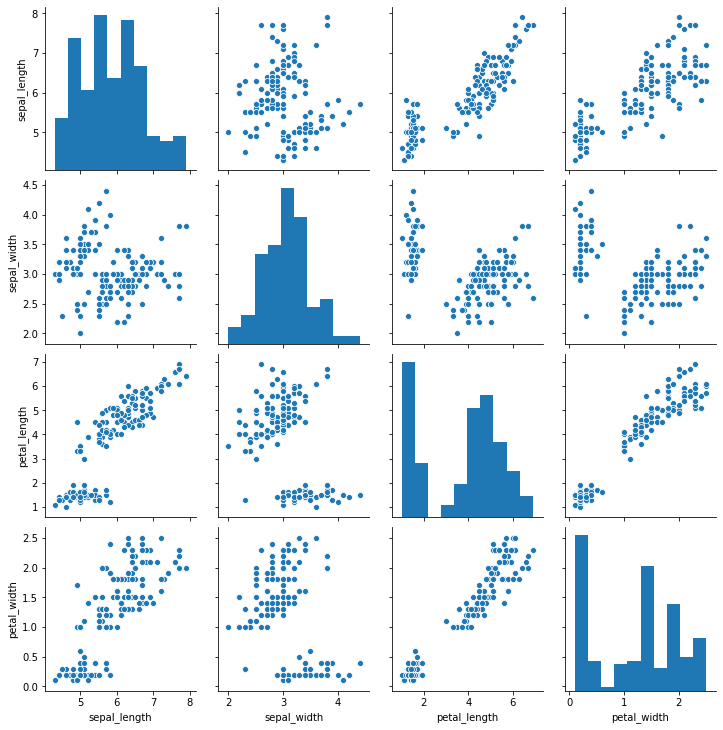

In [8]:
sb.pairplot(df)

c:\program files\python38\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


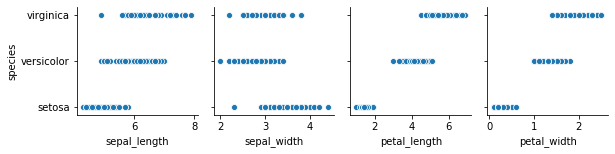

In [9]:
sb.pairplot(df,x_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],y_vars=['species'],size=2)

In [10]:
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [11]:
x.shape

(150, 4)

In [12]:
y=df[['species']]

In [13]:
y.shape

(150, 1)

In [14]:
x.iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

In [15]:
y.iloc[0]

species    setosa
Name: 0, dtype: object

***Splitting***

In [16]:
from sklearn .model_selection import train_test_split
from sklearn import metrics

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=90)

In [18]:
X_train.shape #SHAPE of the training part after splitting

(112, 4)

In [19]:
y_train.shape

(112, 1)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knc =KNeighborsClassifier(n_neighbors=1)

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
l=LinearDiscriminantAnalysis()

In [22]:
kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
results=cross_val_score(l,X_train,y_train,cv=kfold,scoring='accuracy')

c:\program files\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

### ***TRAINING THE MODEL USING K-NEAREST-NEIGHBORS ALGORITHM***

In [23]:
print(results.mean())

0.9734848484848484


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knc =KNeighborsClassifier(n_neighbors=1)

In [25]:
knc.fit(X_train,y_train)

<ipython-input-25-9ea0ea2af688>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knc.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [26]:
X_new = np.array([[5,2.9,1,0.2]])
X_new.shape

(1, 4)

In [31]:
prediction = knc.predict(X_new)
print((prediction))

['setosa']


In [28]:
y_pred = knc.predict(X_test)
print("TEST SET PREDICTIONS :\n {}".format(y_pred))

TEST SET PREDICTIONS :
 ['versicolor' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa'
 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica']


In [29]:
y_test

,species
90,versicolor
16,setosa
15,setosa
111,virginica
136,virginica
44,setosa
85,versicolor
116,virginica
49,setosa
124,virginica


## **SCORE**

In [30]:
score = knc.score(X_test,y_test)
print(f"Accuracy : {score*100 :.2f} %")

Accuracy : 97.37 %
